In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import decision_trees_utils as utils

import common_decision_trees_retake as cm

# Part 1: Information Gain

Important note: this exercise uses Pandas (for data manipulation and analysis) and Graphviz (for graph-drawing) libraries.

This exercise consists of 3 parts. Complete the first part to get a mark of 3.0, the first two parts to get 4.0, complete all assignments to get 5.0.

1.1 ) There are 10 objects (data) characterized with 5 binary attributes.
1.2) Each object is assigned to either a class "0" or "1". The assignments are as follows (cl):

In [2]:
attributeNames = ["attr_1", "attr_2", "attr_3", "attr_4", "attr_5"]

data = pd.DataFrame(
    [
        [1, 0, 1, 1, 1],
        [1, 1, 0, 0, 1],
        [0, 1, 1, 1, 1],
        [1, 0, 1, 0, 1],
        [1, 0, 0, 1, 1],
        [0, 0, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 1, 1],
        [0, 1, 0, 0, 1],
        [0, 0, 0, 1, 1],
    ],
    columns=attributeNames,
)

data["cl"] = [1, 1, 1, 0, 0, 1, 1, 1, 0, 0]

1.3 )  Finish the below function for calculating entropy. $H(CL) = - \sum_{y \in CL}p(y)log_2p(y)$ It should return a value of entropy for an input vector CL. Assume that $log_2(0)$ is equal to 0.

1.4 ) Calculate the entropy for the CL vector  (the result should be 0.97095...):

In [3]:
result = utils.get_entropy(data["cl"])
assert round(result, 5) ==  0.97095, result
result

0.9709505944546686

1.5) Finish the below function for calculating a conditional entropy: $H(CL|X) = - \sum_{x \in X} \sum_{y \in CL} p(x,y) log_2 \frac{p(x,y)}{p(x)}$. Assume that $log_2(0)$ is equal to 0 and if $p(x) = 0$, $\frac{p(x,y)}{p(x)}$ is equal to 0 as well.

1.6 ) Calculate conditional entropies for given attribiutes.

In [4]:
print(utils.get_conditional_entropy(data, "attr_1")) ### the result should be 0.95097...
print(utils.get_conditional_entropy(data, "attr_5")) ### the result should be 0.97095...

0.9509775004326937
0.9709505944546686


1.7 ) **Question: Which entropy is lesser and why?**

The first conditional entropy is lesser since it divides the data into less chaotic gropus.

1.8) Finish the below function for calculating information gain (use getEntropy() and getConditionalEntropy() functions):

In [5]:
print(utils.get_information_gain(data, "attr_1"))
print(utils.get_information_gain(data, "attr_5"))

0.01997309402197489
0.0


1.9) **Question: Which IG is lesser and why?**

The second information gain is lesser. It equals zero, because the attribute has the same value for every possible class and therefore splitting the tree on it doesn't improve the calssification at all.

It is an ideal example on low quality data which does not give any insight.

# Part 2: ID3 algorithm

Decision tree consists of decision nodes and leaves. Nodes split data while leaves classify objects. Consider the class "Node" provided below. It consists of 4 fields:
- attr - attribute ID (use the names in attributeNames vector)
- left - left branch, i.e., a reference to other node
- right - right branch, i.e., a reference to other node
- value - a decision. If node = None, then the node is not a leaf. If value is not None, then a node is considered a leaf.

Method __call__ returns the decision if the node is a leaf (i.e., when value is not None).
Otherwise, it calls either the left or the right branch of an input object, based on the attribute value (0 -> left children; 1 -> right children). In this way, we can traverse the decision tree in order to find the final decision.

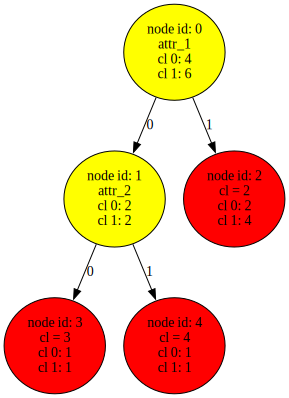

In [6]:
def decision_tree_example(object_to_classify: pd.Series):
    root = cm.Node("attr_1", None, None, None)  ###  IN ROOT SPLIT ON 1ST (0) ATTRIBUTE
    lChildren = cm.Node("attr_2", None, None, None)  ### IN ROOT's LEFT CHILDREN SPLIT ON 2ND (1) ATTRIBUTE
    rChildren = cm.Node(None, None, None, 2)  ### IN ROOT's RIGHT CHILDREN -> DECISION = 2
    root.left = lChildren
    root.right = rChildren
    llChildren = cm.Node(None, None, None, 3)  ### IN ROOT's LEFT-LEFT CHILDREN -> DECISION = 3
    lrChildren = cm.Node(None, None, None, 4)  ### IN ROOT's LEFT-RIGHT CHILDREN -> DECISION = 4
    lChildren.left = llChildren
    lChildren.right = lrChildren
    return root


root = decision_tree_example(pd.Series([0, 0], ['attr 1', 'attr 2']))
### ROOT : FIRST ATTRIBUTE = 0 SO WE GO TO LEFT CHILDREN.
### IT IS A LEAF WITH THE DECISION = 3
### THEN, IN THE CORRESPONDING CHILDREN, THE SECOND ATTRIBUTE = 0, SO WE GO TO LEFT-LEFT CHILDREN
cm.print_graph(root, data)

# decision_tree_example({'attr 1': 0, 'attr 2': 1})
# decision_tree_example(pd.Series([1, 0], ['attr 1', 'attr 2']))
# decision_tree_example({'attr 1': 1, 'attr 2': 1})

2.1) Create an initial root. Set the value (decision) to 1. 

In [7]:
root = cm.Node(0, None, None, 1)

2.2) Use a getErrorRate method in common.py auxiliary file to calculate the error rate. The decision is made based on the majority rule. In case of tie, the method takes 0 as the default class.

In [8]:
result = cm.get_error_rate(root, data)
print(result)
assert result == 0.4, result

0.4


2.3) Use printGraph method (see the common.py file) to draw the decision tree and save it in a png file.

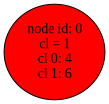

In [9]:
cm.print_graph(root, data)

2.4) Calculate information gain for all attribiutes.

In [10]:
information_gain_for_attributes = utils.get_information_gain_for_attributes(data)
print(information_gain_for_attributes)

{'attr_1': 0.01997309402197489, 'attr_2': 0.0464393446710154, 'attr_3': 0.12451124978365313, 'attr_4': 0.09127744624168, 'attr_5': 0.0}


2.5) Choose the best attribute to split the data (HINT, it should be the third attribute :)). Construct two new nodes: one for $x_i$ = 0 decision and the second for $x_i$ = 1; connect them with the root (left and right branch). Remember to update the root.

In [11]:
chosen_attribute = utils.choose_attribute_to_split(data)
root.attr = chosen_attribute
left_child = cm.Node(None, None, None, 0)
root.left = left_child
right_child = cm.Node(None, None, None, 1)
root.right = right_child
root.value = None

print(chosen_attribute)

attr_3


2.6) Print the graph and calculate the error rate. What happened with the error rate?

In [12]:
print(cm.get_error_rate(root, data))

0.30000000000000004


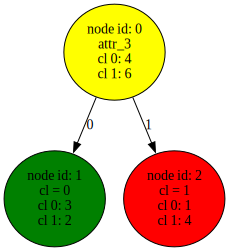

In [13]:
cm.print_graph(root, data)

2.7) Split the 'data' (table) based on the selected attribiute, i.e., create two new tables.

In [14]:
left_data, right_data = utils.split_data_by_the_best_attribute(data)
left_data

,attr_1,attr_2,attr_3,attr_4,attr_5,cl
1,1,1,0,0,1,1
4,1,0,0,1,1,0
7,1,0,0,1,1,1
8,0,1,0,0,1,0
9,0,0,0,1,1,0


In [15]:
right_data

,attr_1,attr_2,attr_3,attr_4,attr_5,cl
0,1,0,1,1,1,1
2,0,1,1,1,1,1
3,1,0,1,0,1,0
5,0,0,1,1,1,1
6,1,1,1,1,1,1


2.8) Let us start with the left node. Firstly, calculate information gain for this node.

In [16]:
utils.get_information_gain_for_attributes(left_data)

{'attr_1': 0.4199730940219749,
 'attr_2': 0.01997309402197489,
 'attr_3': 0.0,
 'attr_4': 0.01997309402197489,
 'attr_5': 0.0}

2.9) Choose the best attribute to split the data and then update the decision tree.

In [17]:
print(utils.choose_attribute_to_split(left_data))

cm.add_children_to_leaf(root.left, utils.choose_attribute_to_split(left_data))

attr_1


2.10) Print the graph and calculate the error rate (HINT: should be 0.2 :). What happened with the error rate?

In [18]:
cm.get_error_rate(root, data=data)  # Error rate has decreased

0.19999999999999996

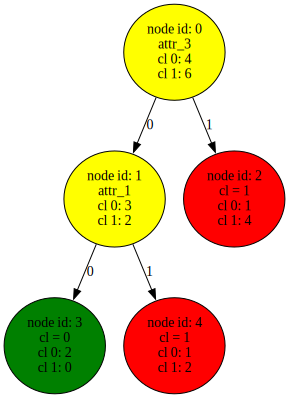

In [19]:
cm.print_graph(root, data=data)

2.11) Split data (remember that we split left_data, not data).

In [20]:
left_left_data, left_right_data = utils.split_data_by_the_best_attribute(left_data)

2.12) Repeat the whole process for the right node.

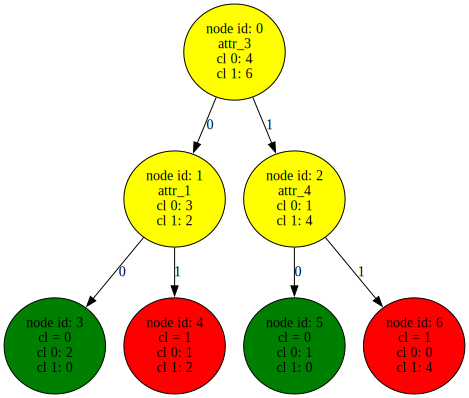

In [21]:
cm.add_children_to_leaf(root.right, utils.choose_attribute_to_split(right_data))
cm.print_graph(root, data=data)

2.13) Let's consider left-left node. Calculate information gain for it.

In [22]:
utils.get_information_gain_for_attributes(left_left_data)

{'attr_1': 0.0, 'attr_2': 0.0, 'attr_3': 0.0, 'attr_4': 0.0, 'attr_5': 0.0}

2.14) Will adding a new node to the tree improve its effectiveness? Why? Why not?

Adding a new node won't improve the effectivness of the tree since all calculated information gains are equal to 0. Therefore splitting on any atrribute will not improve the quality of classification.

2.15) Calculate information gain for the left-right node. (and update the tree)

In [23]:
utils.get_information_gain_for_attributes(left_right_data)

{'attr_1': 0.0,
 'attr_2': 0.2516291673878229,
 'attr_3': 0.0,
 'attr_4': 0.2516291673878229,
 'attr_5': 0.0}

In [24]:
cm.add_children_to_leaf(root.left.right, utils.choose_attribute_to_split(left_right_data))

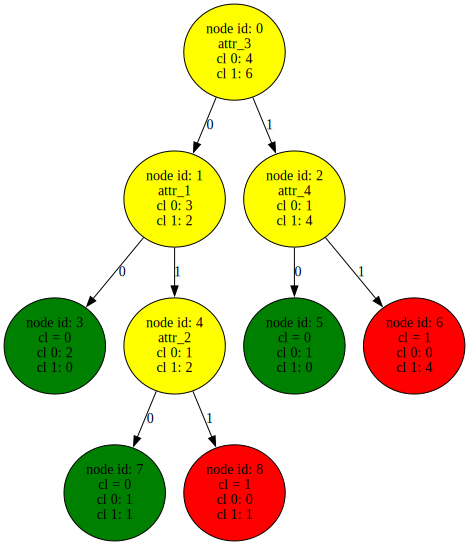

In [25]:
cm.print_graph(root, data)

In [26]:
cm.get_error_rate(root, data)

0.09999999999999998

2.16) What happened with the error rate? Is it necessary to keep these two newly added leaves?

Yes, it was decreased by half.

2.17) Finish creating the right side of the tree

There's no need to split the right node children since all of the IGs are equal to 0

# Part 3: automated construction of decision trees

3.1 Complete the following function for automated construct of decision trees, so that it returns a decision tree for the given data and attribute list. Note that this is a recusive method, i.e., calls itself.

3.2) Build a decision tree for a training dataset in the common.py auxiliary file, for diffrent values of max_depth.  Calculate & compare the error rates for training and validation datasets.

In [27]:
max_depth = 10

In [28]:
train_attributeNames, train_data = cm.get_training_data_set()
valid_attributesName, valid_data = cm.get_validation_data_set()
train_data

,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,cl
0,0,0,1,1,0,1,0
1,1,1,1,1,0,1,0
2,0,1,1,0,1,0,1
3,1,1,0,0,0,0,1
4,0,1,1,1,0,1,1
5,1,1,0,1,1,1,0
6,1,1,1,1,1,1,0
7,0,1,0,0,0,0,1
8,1,0,1,0,1,1,1
9,1,1,1,0,0,0,0


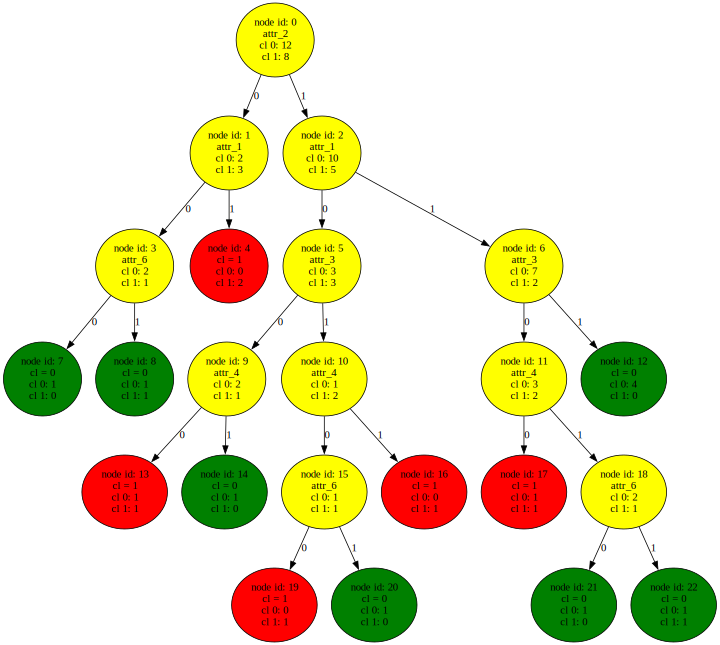

In [29]:
decision_tree = cm.build_tree(train_data, max_depth=max_depth)

cm.print_graph(decision_tree, train_data)

In [30]:
cm.get_error_rate(decision_tree, train_data)

0.19999999999999996

In [31]:
cm.get_error_rate(decision_tree, valid_data)

0.4

3.3) Consider only the training data set and answer the following questions:
* What is the maximum depth of the tree (consider only the training data set)?
* The tree building process should stop when there is no improvement in error rate (why?). Check for which value of "max_dept" there is no improvement in error rate. 

In [32]:
for max_depth in range(10):
    decision_tree = cm.build_tree(train_data, max_depth=max_depth)
    error_train = cm.get_error_rate(decision_tree, train_data)
    error_valid = cm.get_error_rate(decision_tree, valid_data)
    print("maxdepth: ", max_depth, "train: ", error_train, "valid", error_valid)

maxdepth:  0 train:  0.4 valid 0.5
maxdepth:  1 train:  0.35 valid 0.5
maxdepth:  2 train:  0.30000000000000004 valid 0.5
maxdepth:  3 train:  0.25 valid 0.4
maxdepth:  4 train:  0.25 valid 0.5
maxdepth:  5 train:  0.19999999999999996 valid 0.4
maxdepth:  6 train:  0.19999999999999996 valid 0.4
maxdepth:  7 train:  0.19999999999999996 valid 0.4
maxdepth:  8 train:  0.19999999999999996 valid 0.4
maxdepth:  9 train:  0.19999999999999996 valid 0.4


Maximum tree depth is 6.

For max_depth > 5, there is no improvement in error rate.